<a href="https://colab.research.google.com/github/heroza/imbalance/blob/main/hello-imblearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0)

In [3]:
from collections import Counter
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 990, 1: 10})


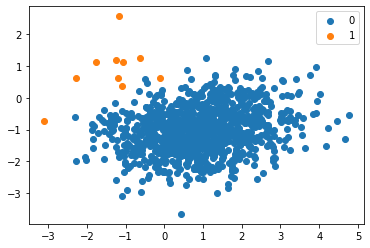

In [4]:
# scatter plot of examples by class label
from matplotlib import pyplot
from numpy import where
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))
print('FBeta Score: %.3f' % fbeta_score(testy, yhat, beta=1))

Accuracy: 0.996
Precision: 1.000
Recall: 0.600
F-measure: 0.750
FBeta Score: 0.750


In [7]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from imblearn.under_sampling import RandomUnderSampler
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

Counter({0: 9900, 1: 100})
Counter({0: 200, 1: 100})


In [9]:
from imblearn.over_sampling import SMOTE
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 4950})


In [10]:
from imblearn.combine import SMOTEENN
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
print(Counter(y))
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = sample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9128, 1: 4169})


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
# model = LogisticRegression(solver='liblinear', class_weight='balanced')
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('F-Measure: %.3f' % f1_score(testy, yhat))

F-Measure: 0.222
